#**Customer Churn Prediction**
The Customer Churn table contains information on all 7,043 customers from a Telecommunications company in California in Q2 2022

Each record represents one customer, and contains details about their demographics, location, tenure, subscription services, status for the quarter (joined, stayed, or churned), and more!

The Zip Code Population table contains complimentary information on the estimated populations for the California zip codes in the Customer Churn table:

In [90]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv('/content/telecom_customer_churn.csv')

###**EDA**

In [92]:
print(df.head(10))

  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   
5  0013-MHZWF  Female   23      No                     3      Midpines   
6  0013-SMEOE  Female   67     Yes                     0        Lompoc   
7  0014-BMAQU    Male   52     Yes                     0          Napa   
8  0015-UOCOJ  Female   68      No                     0   Simi Valley   
9  0016-QLJIS  Female   43     Yes                     1      Sheridan   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 

In [93]:
df.shape

(7043, 38)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [95]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [96]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [97]:
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

###**Data Preprocessing**

In [98]:
df1 = df.copy()

In [99]:
#Dropping unwanted columns
df1.drop(['Customer ID','Total Refunds','Zip Code','Latitude', 'Longitude','Churn Category', 'Churn Reason'],axis='columns',inplace=True)


In [100]:
df1.shape

(7043, 31)

In [101]:
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [102]:
# checking of number of unique values in each column

for col in df1.columns:
  print(col,':',df1[col].nunique())


Gender : 2
Age : 62
Married : 2
Number of Dependents : 10
City : 1106
Number of Referrals : 12
Tenure in Months : 72
Offer : 5
Phone Service : 2
Avg Monthly Long Distance Charges : 3583
Multiple Lines : 2
Internet Service : 2
Internet Type : 3
Avg Monthly GB Download : 49
Online Security : 2
Online Backup : 2
Device Protection Plan : 2
Premium Tech Support : 2
Streaming TV : 2
Streaming Movies : 2
Streaming Music : 2
Unlimited Data : 2
Contract : 3
Paperless Billing : 2
Payment Method : 3
Monthly Charge : 1591
Total Charges : 6540
Total Extra Data Charges : 16
Total Long Distance Charges : 6068
Total Revenue : 6975
Customer Status : 3


In [103]:
# Getting the percentge of Null Values in each Column
(df1.isnull().sum()/len(df1))*100

Gender                                0.000000
Age                                   0.000000
Married                               0.000000
Number of Dependents                  0.000000
City                                  0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                55.047565
Phone Service                         0.000000
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
Internet Service                      0.000000
Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech Support                 21.666903
Streaming TV                         21.666903
Streaming Movies                     21.666903
Streaming Music                      21.666903
Unlimited Dat

In [104]:
#clean dataset
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [105]:
df1=df1.interpolate()

In [106]:
df1=df1.dropna()

In [107]:
print(df.head(10))


  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   
5  0013-MHZWF  Female   23      No                     3      Midpines   
6  0013-SMEOE  Female   67     Yes                     0        Lompoc   
7  0014-BMAQU    Male   52     Yes                     0          Napa   
8  0015-UOCOJ  Female   68      No                     0   Simi Valley   
9  0016-QLJIS  Female   43     Yes                     1      Sheridan   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 

In [108]:
df['Unlimited Data']

0       Yes
1        No
2       Yes
3       Yes
4       Yes
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042    Yes
Name: Unlimited Data, Length: 7043, dtype: object

In [109]:
number_columns=['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Charges','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

In [110]:
#Checking the unique values of column having datatype: 'object'
def unique_values_names(df):
    for column in df1.select_dtypes(include=['object']).columns:
        print(f"Unique values in column '{column}': {df1[column].unique()}")


In [111]:
unique_values_names(df1)

Unique values in column 'Gender': ['Male' 'Female']
Unique values in column 'Married': ['No' 'Yes']
Unique values in column 'City': ['Costa Mesa' 'Martinez' 'Midpines' 'Lompoc' 'Napa' 'Simi Valley'
 'La Mesa' 'Woodlake' 'San Marcos' 'Alpaugh' 'Moss Beach' 'Stockton'
 'Los Angeles' 'Yermo' 'Fremont' 'El Portal' 'Calistoga' 'North Hollywood'
 'Inverness' 'Modesto' 'Kenwood' 'Morongo Valley' 'Palo Verde' 'Valyermo'
 'Monterey Park' 'Big Oak Flat' 'Glenhaven' 'Lodi' 'Fairfield' 'Moorpark'
 'Solvang' 'Del Rey' 'Armona' 'Mckinleyville' 'Calimesa' 'Garden Grove'
 'Indio' 'San Diego' 'Escondido' 'Chino' 'Calexico' 'Groveland'
 'Los Gatos' 'Clovis' 'Buellton' 'Midway City' 'Folsom' 'San Clemente'
 'Bodega Bay' 'Challenge' 'Ludlow' 'Santa Clara' 'Rescue' 'Lotus'
 'Harbor City' 'Death Valley' 'Riverdale' 'Claremont' 'Upland'
 'Santa Rosa' 'Long Beach' 'Samoa' 'Milford' 'Anderson' 'Orange'
 'San Francisco' 'Santa Cruz' 'Lake Hughes' 'Paramount'
 'San Juan Capistrano' 'Copperopolis' 'Cypress' 'Lanc

###**Data Visualization**

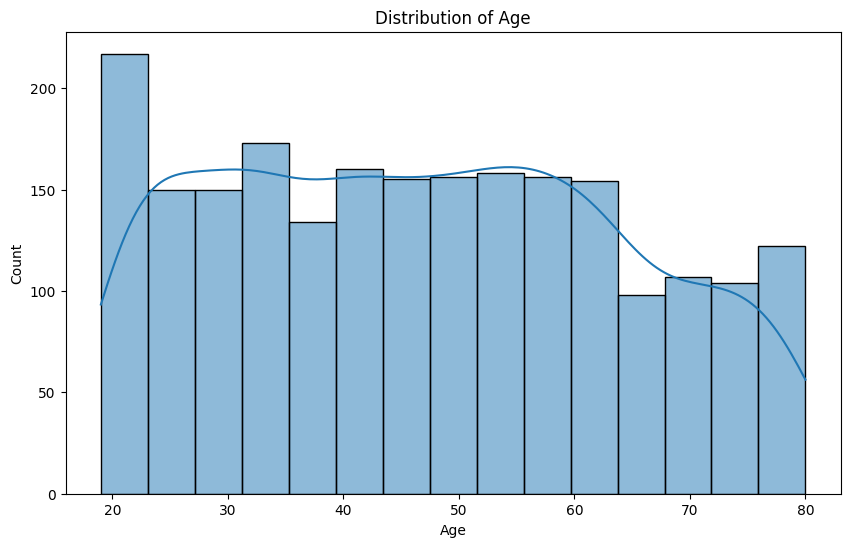

In [112]:
# Visualizing Column 'Age' in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of Dependents'}>,
        <Axes: title={'center': 'Number of Referrals'}>],
       [<Axes: title={'center': 'Tenure in Months'}>,
        <Axes: title={'center': 'Avg Monthly Long Distance Charges'}>,
        <Axes: title={'center': 'Avg Monthly GB Download'}>],
       [<Axes: title={'center': 'Monthly Charge'}>,
        <Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Total Extra Data Charges'}>],
       [<Axes: title={'center': 'Total Long Distance Charges'}>,
        <Axes: title={'center': 'Total Revenue'}>, <Axes: >]],
      dtype=object)

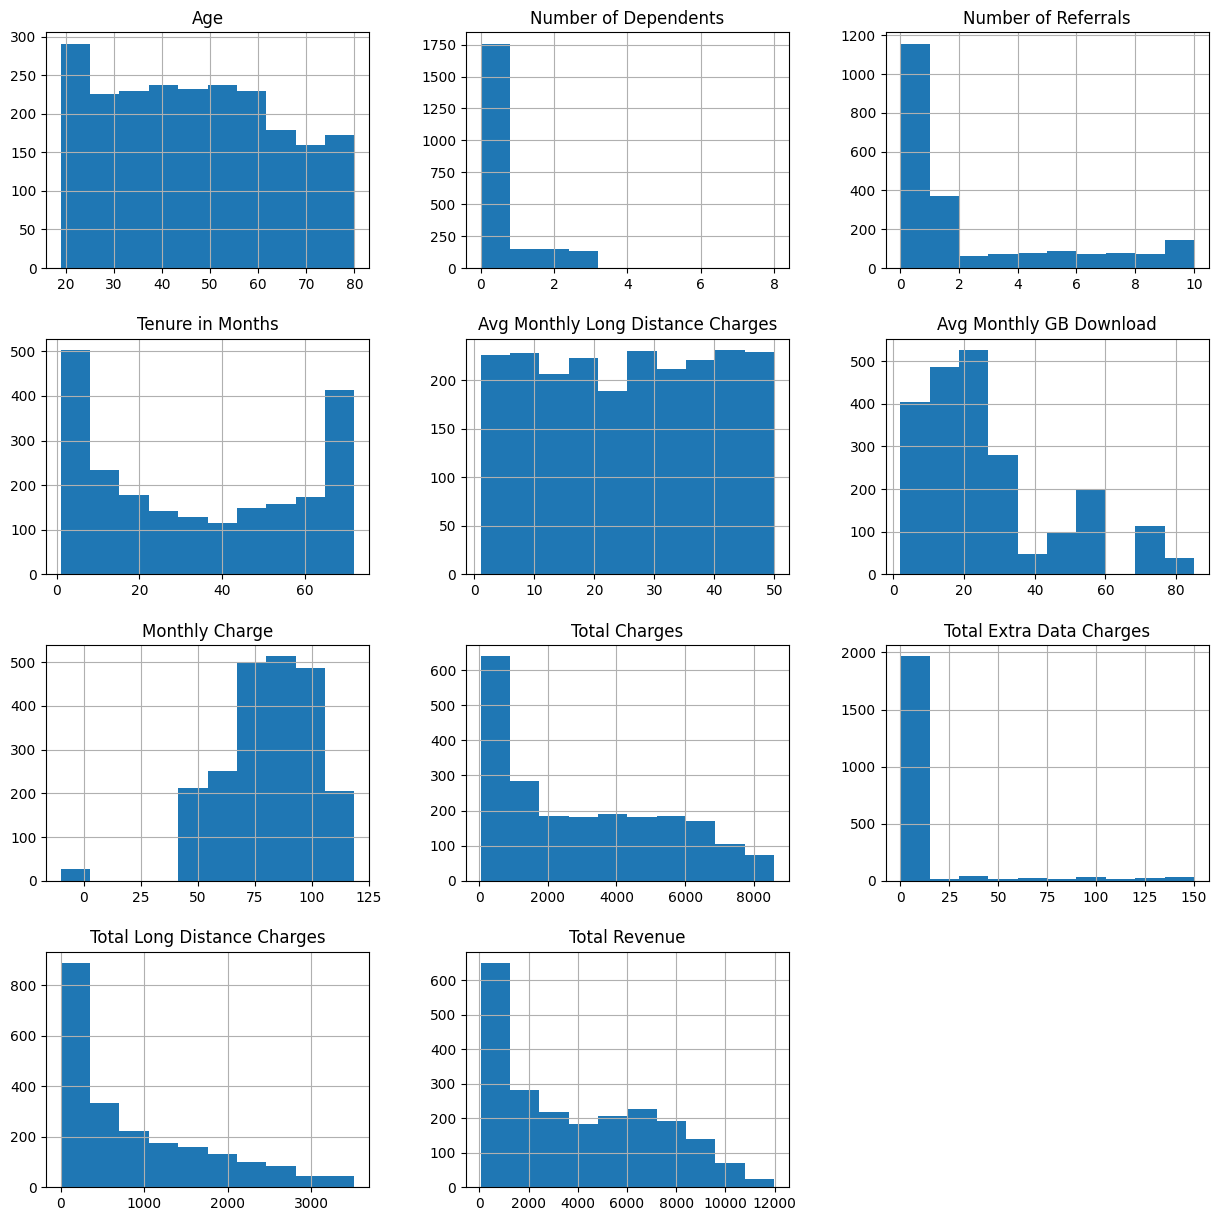

In [113]:
# Visualizing the stats in number_columns of the copied dataset
df1.hist(figsize=(15,15))


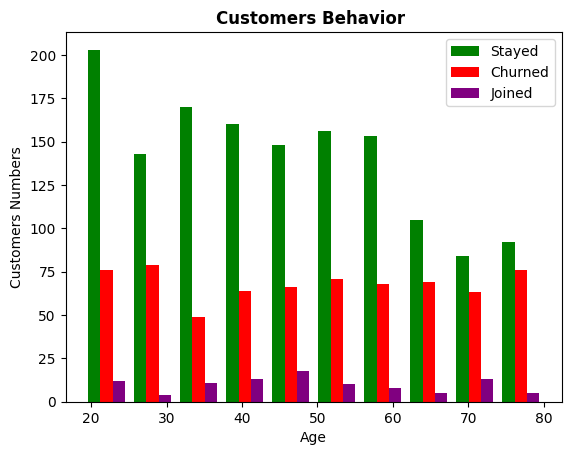

In [114]:
#Visualizing the number of customers who churned, stayed or joined in the company with a bar plot
Customer_Stayed=df1[df1['Customer Status']=='Stayed'].Age
Customer_Churned=df1[df1['Customer Status']=='Churned'].Age
Customer_Joined=df1[df1['Customer Status']=='Joined'].Age

plt.xlabel('Age')
plt.ylabel('Customers Numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['green','red','purple'],label=['Stayed','Churned','Joined'])

plt.title('Customers Behavior ',fontweight ="bold")
plt.legend()

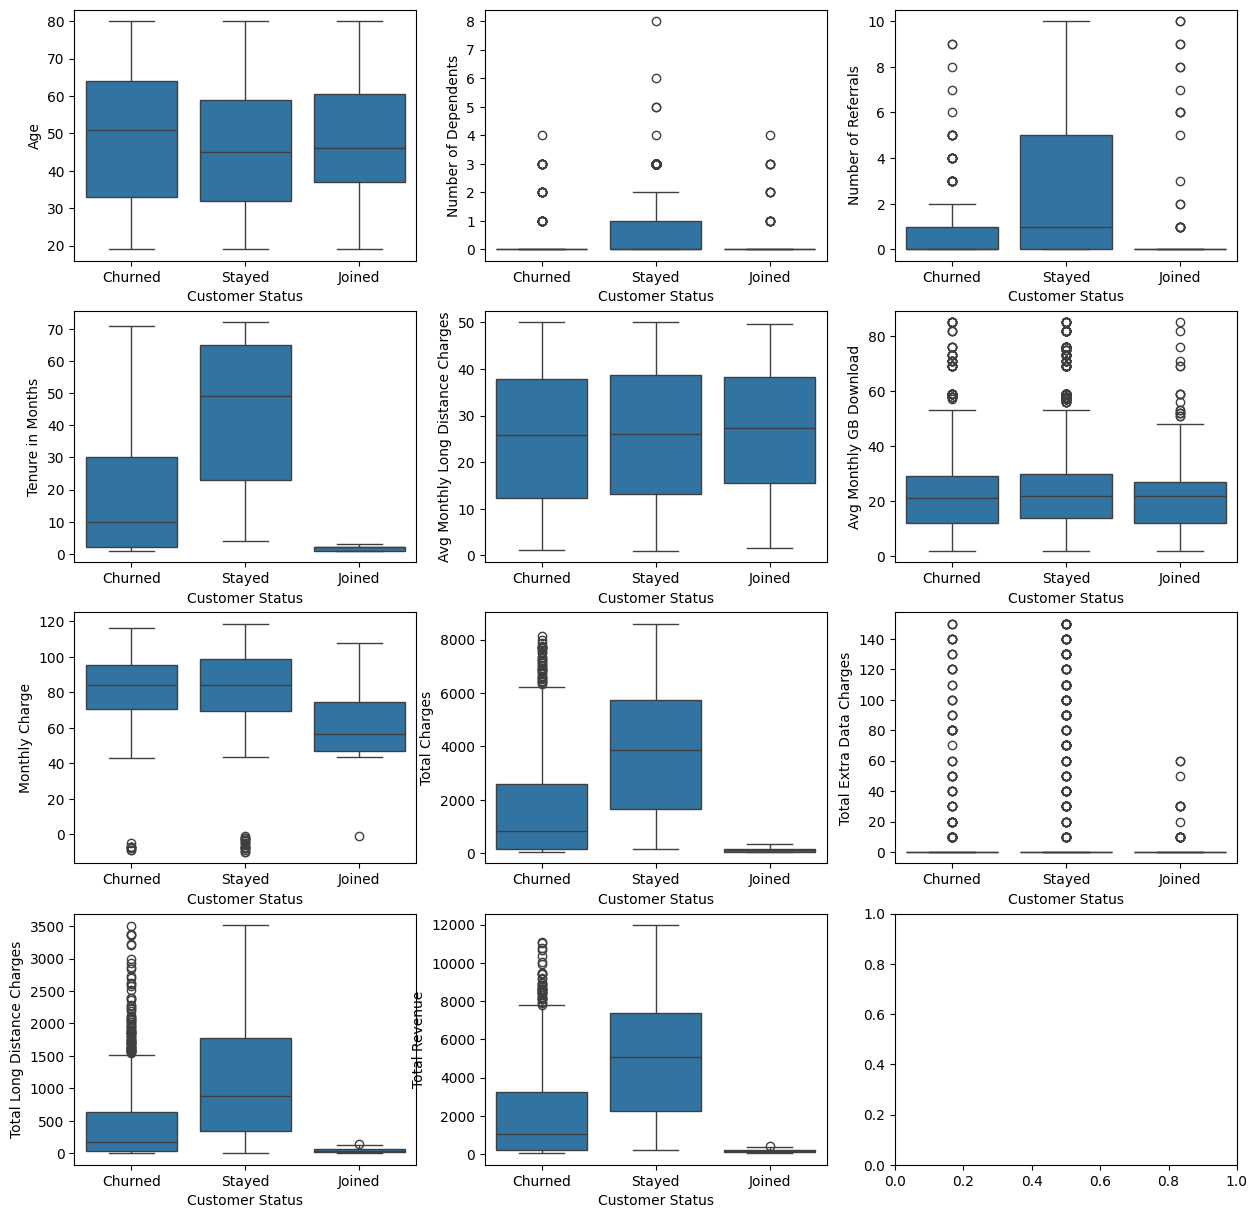

In [115]:
fig, ax = plt.subplots(4,3, figsize = (15,15))
for i, subplot in zip(number_columns, ax.flatten()):
    sns.boxplot(x = 'Customer Status', y = i , data = df1, ax = subplot)

In [118]:
!pip install plotly
import plotly.express as px
fig = px.density_heatmap(df1, x='Age', y='Total Charges')
fig.show()


<Axes: xlabel='Customer Status'>

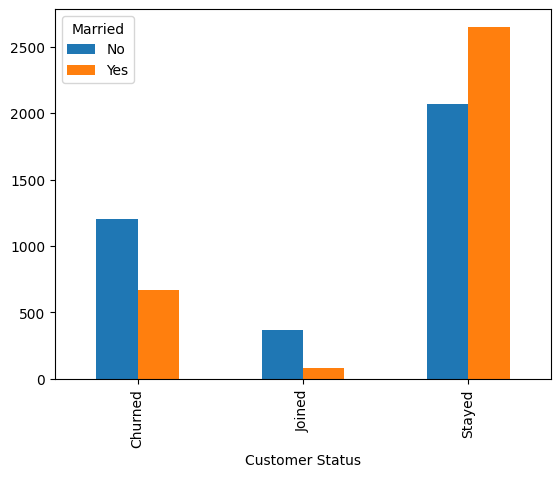

In [120]:
pd.crosstab(df['Customer Status'], df['Married']).plot(kind='bar')

<Axes: xlabel='Customer Status'>

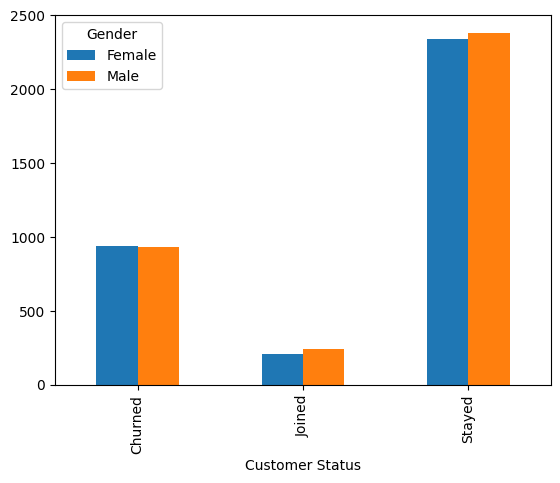

In [121]:
pd.crosstab(df['Customer Status'], df['Gender']).plot(kind='bar')

In [122]:
df1['Payment Method'].unique()

array(['Bank Withdrawal', 'Credit Card', 'Mailed Check'], dtype=object)

In [123]:
#Create dictionary with role / data key value pairs
Roles = {}
for j in df1['Payment Method'].unique():
    Roles[j] = df1[df1['Payment Method'] == j]

In [124]:
Roles.keys()

dict_keys(['Bank Withdrawal', 'Credit Card', 'Mailed Check'])

In [125]:
#Selecting the rows where the role is 'Credit Card'
Roles['Credit Card']

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
5,Female,23,No,3,Midpines,0,9,Offer E,Yes,16.77,...,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0,150.93,722.38,Stayed
7,Male,52,Yes,0,Napa,8,63,Offer B,Yes,12.96,...,No,Two Year,Yes,Credit Card,84.65,5377.80,20,816.48,6214.28,Stayed
15,Female,58,Yes,2,Woodlake,9,71,Offer A,Yes,27.26,...,Yes,Two Year,Yes,Credit Card,95.75,6849.40,0,1935.46,8784.86,Stayed
30,Male,23,Yes,3,Moss Beach,1,37,Offer C,Yes,43.01,...,Yes,One Year,No,Credit Card,91.20,3247.55,0,1591.37,4838.92,Stayed
41,Female,20,No,0,Fremont,0,27,Offer C,Yes,48.91,...,Yes,One Year,No,Credit Card,78.20,2078.95,0,1320.57,3399.52,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,Female,20,No,0,Los Angeles,0,7,Offer E,Yes,36.49,...,Yes,One Year,Yes,Credit Card,94.05,633.45,0,255.43,888.88,Stayed
7036,Female,53,No,0,Hume,0,1,Offer E,Yes,42.09,...,Yes,Month-to-Month,Yes,Credit Card,70.15,70.15,0,42.09,112.24,Churned
7038,Female,20,No,0,La Mesa,0,13,Offer D,Yes,46.68,...,Yes,One Year,No,Credit Card,55.15,742.90,0,606.84,1349.74,Stayed
7040,Male,22,No,0,Elk,0,2,Offer E,Yes,18.62,...,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0,37.24,129.99,Joined


In [126]:
len(Roles)

3

In [127]:
#Checking the number of Offers in the dataset
off = df1['Offer'].value_counts()
off

Offer
Offer B    585
Offer E    544
Offer D    392
Offer A    382
Offer C    291
Name: count, dtype: int64

<Axes: xlabel='Offer'>

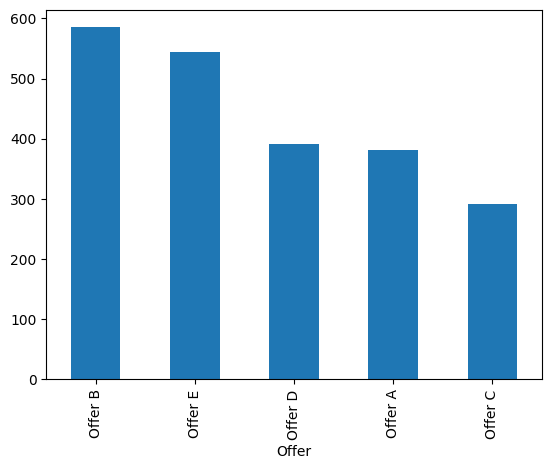

In [129]:
off.plot(kind='bar')

In [131]:
df1_off = Roles['Credit Card'].Offer.value_counts()
df1_off

Offer
Offer B    204
Offer A    171
Offer E    126
Offer D    119
Offer C     96
Name: count, dtype: int64

<Axes: xlabel='Offer'>

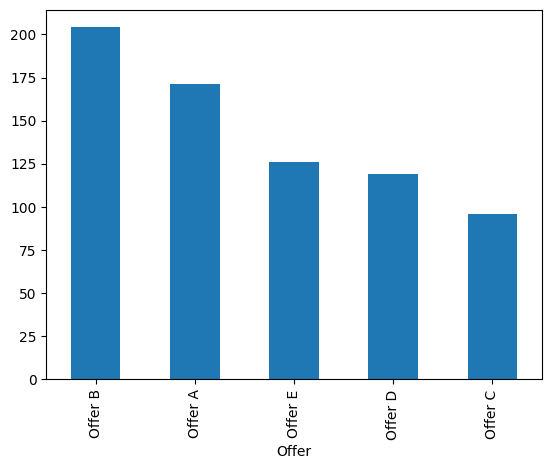

In [132]:
df1_off.plot(kind='bar')

In [133]:
df1 = df1.rename(columns = {'Customer Status':'Customer_Status'})

In [134]:
Roles1 = {}
for k in df1['Customer_Status'].unique():
    Roles1[k] = df1[df1['Customer_Status'] == k]
Roles1.keys()

dict_keys(['Churned', 'Stayed', 'Joined'])

In [135]:
df1_state = Roles1['Stayed'].Offer.value_counts()
df1_state

Offer
Offer B    497
Offer A    348
Offer D    250
Offer C    204
Offer E    115
Name: count, dtype: int64

<Axes: xlabel='Offer'>

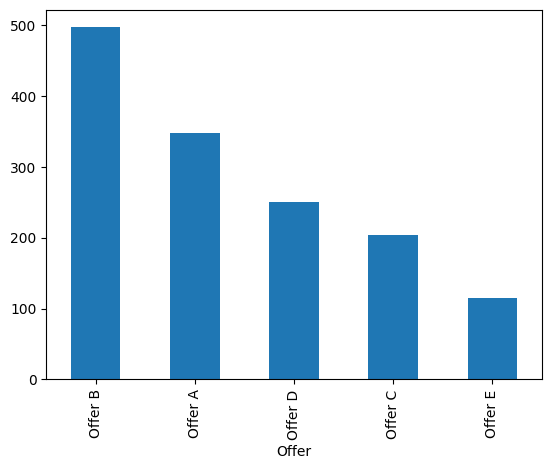

In [136]:
df1_state.plot(kind='bar')

###**Data** **Modelling**

In [137]:
#label encoding gender column
df1.replace({"Gender":{'Female':0,'Male':1}},inplace=True)

In [138]:
#label encoding 'yes' and 'no' output by column
yes_and_no=[  'Paperless Billing', 'Unlimited Data',
       'Streaming Movies', 'Streaming Music',  'Streaming TV',
       'Premium Tech Support', 'Device Protection Plan', 'Online Backup', 'Online Security',
       'Multiple Lines',  'Married']
for i in yes_and_no:
    df1.replace({'No':0,'Yes':1},inplace=True)

In [139]:
df1.replace({"Phone Service":{'Yes':1}},inplace=True)

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.Customer_Status = le.fit_transform(df1.Customer_Status)

In [141]:
df1 = pd.get_dummies(data=df1, columns=['Payment Method','Contract','Internet Type','Offer','City'])

In [142]:
cols_to_scale = ['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [143]:
#Dropping the Customer_Status
X = df1.drop('Customer_Status',axis='columns')
y = df1['Customer_Status']

In [144]:
y.head()

2    0
3    0
5    2
6    2
7    2
Name: Customer_Status, dtype: int64

###**Spliiting the data in Training and Test Data**

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [147]:
# create Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)


RandomForestClassifier()

In [149]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [150]:
#GaussianNB

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [151]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

# create Decision Tree Classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [152]:
#XGB Classifier

from xgboost import XGBClassifier

# create XGBoost Classifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [153]:
# Evaluate models
from sklearn.metrics import accuracy_score

y_pred_rf = model_rf.predict(X_test)
y_pred_lr = model.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("Accuracy of Random Forest:", accuracy_rf)
print("Accuracy of Logistic Regression:", accuracy_lr)
print("Accuracy of GaussianNB:", accuracy_gnb)
print("Accuracy of Decision Tree:", accuracy_dt)
print("Accuracy of XGBoost:", accuracy_xgb)

# Find the best model
best_model = max([("Random Forest", accuracy_rf),
                  ("Logistic Regression", accuracy_lr),
                  ("GaussianNB", accuracy_gnb),
                  ("Decision Tree", accuracy_dt),
                  ("XGBoost", accuracy_xgb)], key=lambda x: x[1])

print("\nBest Model:", best_model[0], "with accuracy:", best_model[1])


Accuracy of Random Forest: 0.7949886104783599
Accuracy of Logistic Regression: 0.7949886104783599
Accuracy of GaussianNB: 0.4054669703872437
Accuracy of Decision Tree: 0.7517084282460137
Accuracy of XGBoost: 0.806378132118451

Best Model: XGBoost with accuracy: 0.806378132118451


In [154]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Create a new XGBoost model with the best parameters
best_xgb_model = XGBClassifier(**best_params)

# Fit the best model to the training data
best_xgb_model.fit(X_train, y_train)

# Evaluate the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print("Accuracy of Best XGBoost Model:", accuracy_best_xgb)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best Score: 0.8358974358974359
Accuracy of Best XGBoost Model: 0.8177676537585421


In [158]:
#apply best xgboost on test dataset
y_pred_best_xgb = best_xgb_model.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print("Accuracy of Best XGBoost Model:", accuracy_best_xgb)

Accuracy of Best XGBoost Model: 0.8177676537585421


              precision    recall  f1-score   support

           0       0.75      0.68      0.71       145
           1       0.64      0.44      0.52        16
           2       0.86      0.91      0.88       278

    accuracy                           0.82       439
   macro avg       0.75      0.68      0.70       439
weighted avg       0.81      0.82      0.81       439



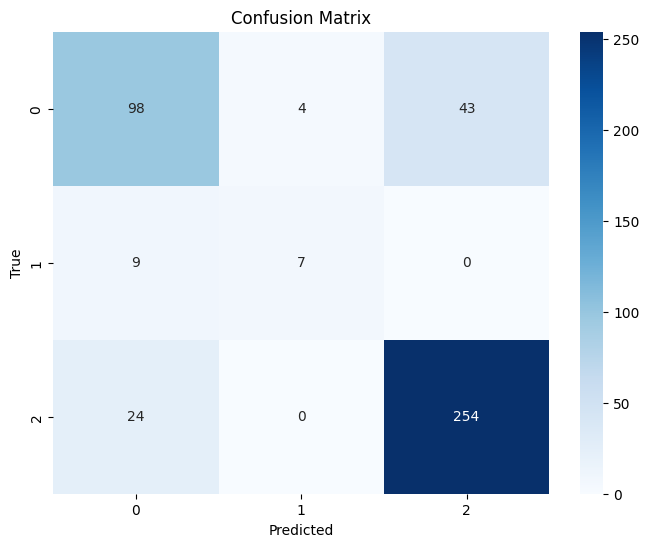

In [159]:
#classification report and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
print(classification_report(y_test, y_pred_best_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
